In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import os
import numpy as np

def acc_top5(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=5)

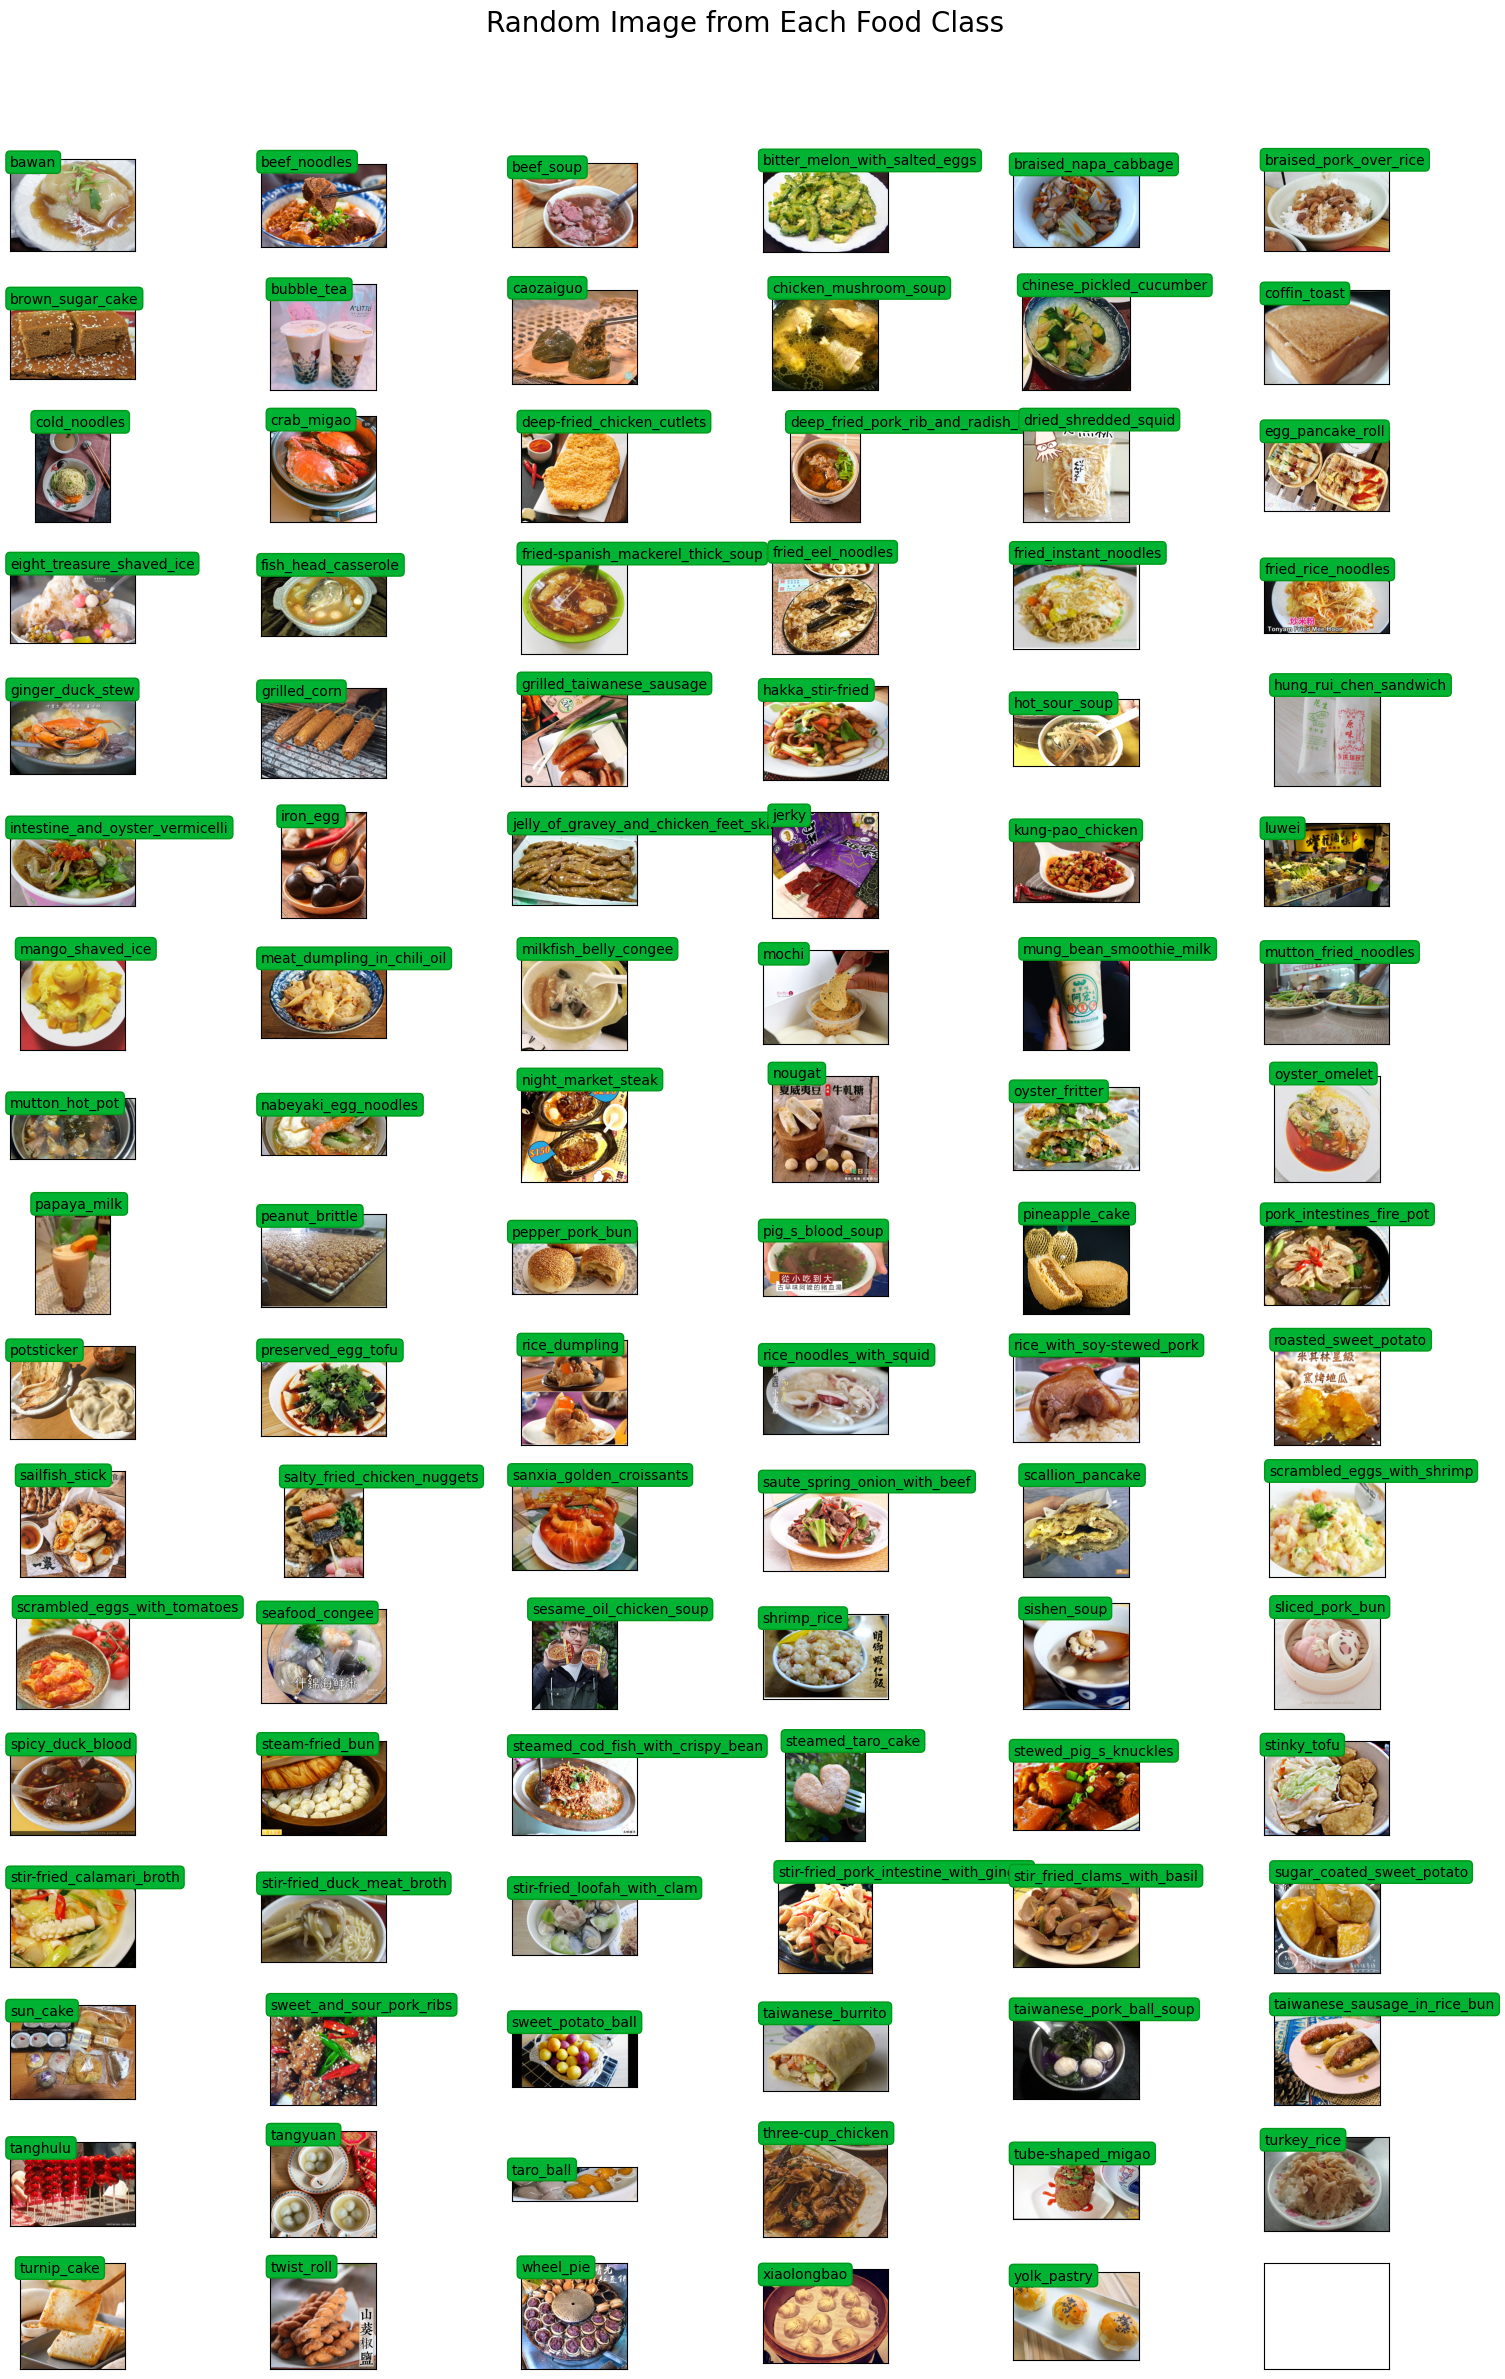

In [2]:
root_dir = './train'
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(15, 25))
fig.suptitle('Random Image from Each Food Class', fontsize=20)
sorted_food_dirs = sorted(os.listdir(root_dir))
for i in range(rows):
    for j in range(cols):
        try:
            food_dir = sorted_food_dirs[i*cols + j]
        except:
            break
        all_files = os.listdir(os.path.join(root_dir, food_dir))
        rand_img = np.random.choice(all_files)
        img = plt.imread(os.path.join(root_dir, food_dir, rand_img))
        ax[i][j].imshow(img)
        ec = (0, .6, .1)
        fc = (0, .7, .2)
        ax[i][j].text(0, -20, food_dir, size=10, rotation=0,
                ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=ec, fc=fc))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "./train/"

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=30,
        brightness_range=[0.8, 1.2],
        horizontal_flip=True,
        vertical_flip=True,
        validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    subset='training'
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

valid_generator = valid_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    color_mode = "rgb",
    shuffle=True,
    seed=42,
    subset='validation'
)


Found 16323 images belonging to 101 classes.
Found 4049 images belonging to 101 classes.


In [3]:
from tensorflow.keras.applications import DenseNet121, InceptionV3, VGG16, ResNet50, MobileNetV3Small,Xception

base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
# base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
# base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
# base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
# base_model = MobileNetV3Small(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
# base_model = Xception(include_top=False, weights='imagenet', input_shape=(224, 224, 3))


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
x = base_model.output
print(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)

predictions = Dense(101, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 1024), dtype=tf.float32, name=None), name='relu/Relu:0', description="created by layer 'relu'")


In [6]:
model.compile(Adam(learning_rate=0.00002122),
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', acc_top5])

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

filepath="./bestModel.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=True)
es = EarlyStopping(monitor='val_accuracy', patience=20, verbose=0, mode='auto')

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size 
STEP_SIZE_VALID = valid_generator.n // valid_generator.batch_size

history = model.fit(
      train_generator,
      steps_per_epoch=STEP_SIZE_TRAIN,
      epochs=50,
      validation_data=valid_generator,
      validation_steps=STEP_SIZE_VALID,
      callbacks=[es, checkpoint]
)

Epoch 1/50
 24/510 [>.............................] - ETA: 2:49 - loss: 6.5261 - accuracy: 0.0091 - acc_top5: 0.0482

c:\Users\rich2\anaconda3\envs\tf\lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


197/510 [==========>...................] - ETA: 1:57 - loss: 5.2149 - accuracy: 0.0290 - acc_top5: 0.1071

c:\Users\rich2\anaconda3\envs\tf\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


510/510 [==============================] - ETA: 0s - loss: 4.5644 - accuracy: 0.0683 - acc_top5: 0.2050
Epoch 1: val_accuracy improved from -inf to 0.01116, saving model to .\bestModel.h5
510/510 [==============================] - 227s 436ms/step - loss: 4.5644 - accuracy: 0.0683 - acc_top5: 0.2050 - val_loss: 4.6895 - val_accuracy: 0.0112 - val_acc_top5: 0.0521
Epoch 2/50
510/510 [==============================] - ETA: 0s - loss: 3.3173 - accuracy: 0.2138 - acc_top5: 0.4764
Epoch 2: val_accuracy did not improve from 0.01116
510/510 [==============================] - 219s 429ms/step - loss: 3.3173 - accuracy: 0.2138 - acc_top5: 0.4764 - val_loss: 4.9272 - val_accuracy: 0.0084 - val_acc_top5: 0.0568
Epoch 3/50
510/510 [==============================] - ETA: 0s - loss: 2.7140 - accuracy: 0.3242 - acc_top5: 0.6243
Epoch 3: val_accuracy did not improve from 0.01116
510/510 [==============================] - 216s 423ms/step - loss: 2.7140 - accuracy: 0.3242 - acc_top5: 0.6243 - val_loss: 5.

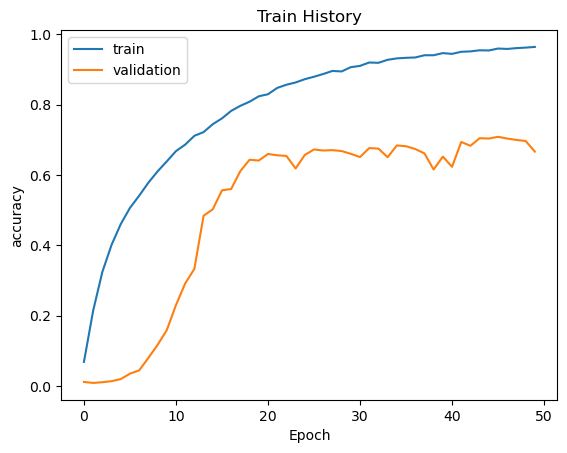

In [8]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
    
    
show_train_history(history,"accuracy","val_accuracy")